In [14]:
import pandas as pd
fre = '5min'
ticks = pd.read_csv('TX00_Tick_04.txt',parse_dates=[['date','time']])
import datetime
def check_normal_time(time_input):
    if ((time_input.time() >= datetime.time(8,45,0) and time_input.time() <= datetime.time(13,45,0))):
        return True
    else:
        return False
normal_ticks = ticks[ticks['date_time'].apply(lambda x : check_normal_time(x)) ]
normal_ticks = normal_ticks.set_index('date_time')
demo_five_normal_ticks = normal_ticks['close'].resample(fre).ohlc()
demo_five_normal_ticks['volume'] = normal_ticks['qty'].resample(fre).sum()
demo_five_normal_ticks = demo_five_normal_ticks.reset_index()
demo_five_normal_ticks = demo_five_normal_ticks.dropna(axis=0,how='any')

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(demo_five_normal_ticks)

               date_time   ...    volume
0    2018-04-02 08:45:00   ...      2999
1    2018-04-02 08:50:00   ...      1052
2    2018-04-02 08:55:00   ...      2616
3    2018-04-02 09:00:00   ...      4072
4    2018-04-02 09:05:00   ...      2015
5    2018-04-02 09:10:00   ...      3387
6    2018-04-02 09:15:00   ...      3803
7    2018-04-02 09:20:00   ...      3274
8    2018-04-02 09:25:00   ...      2471
9    2018-04-02 09:30:00   ...      3429
10   2018-04-02 09:35:00   ...      3000
11   2018-04-02 09:40:00   ...      1110
12   2018-04-02 09:45:00   ...       789
13   2018-04-02 09:50:00   ...      1241
14   2018-04-02 09:55:00   ...      1801
15   2018-04-02 10:00:00   ...      2348
16   2018-04-02 10:05:00   ...      1873
17   2018-04-02 10:10:00   ...      2555
18   2018-04-02 10:15:00   ...      1347
19   2018-04-02 10:20:00   ...      4564
20   2018-04-02 10:25:00   ...      1247
21   2018-04-02 10:30:00   ...      8371
22   2018-04-02 10:35:00   ...      8604
23   2018-04-02 

In [16]:
one_day_demo_five_normal_ticks = demo_five_normal_ticks[demo_five_normal_ticks['date_time'].apply(lambda dt: datetime.date( dt.year, dt.month, dt.day)==datetime.date(2018,4,26))]

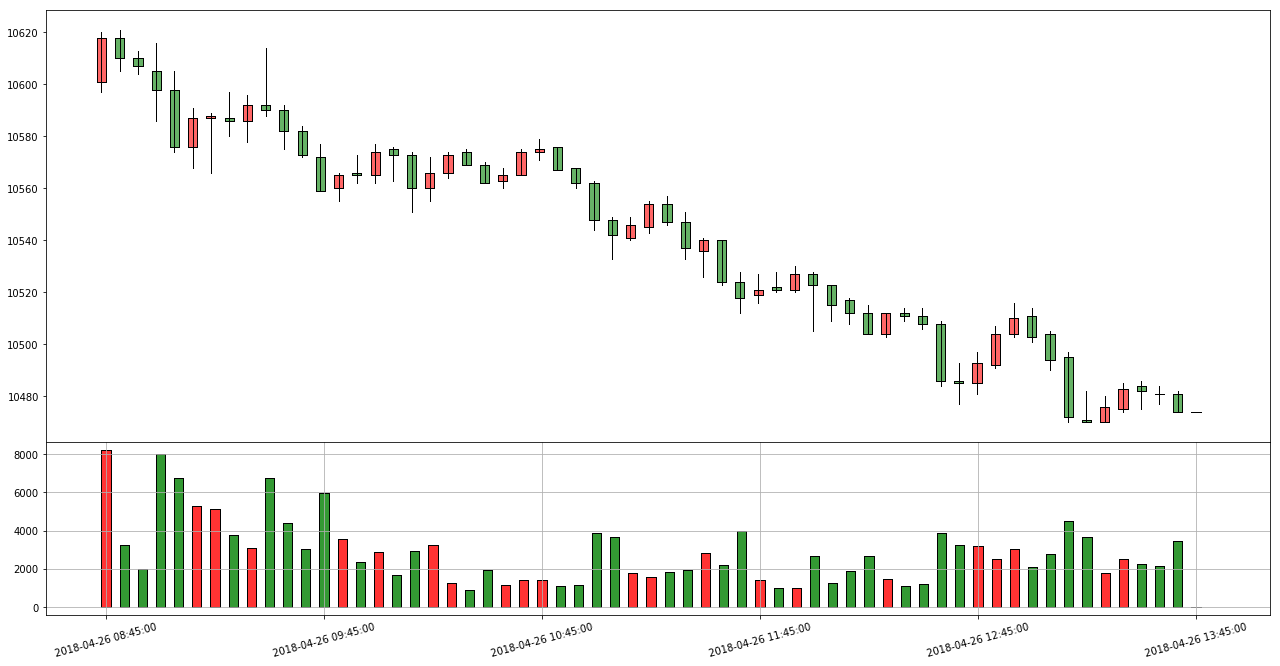

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
%matplotlib inline
fig = plt.figure(figsize=(17, 12))

ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(one_day_demo_five_normal_ticks['date_time']), 12))
ax.set_xticklabels(one_day_demo_five_normal_ticks['date_time'][::12])
ax2.set_xticks(range(0, len(one_day_demo_five_normal_ticks['date_time']), 12))
ax2.set_xticklabels(one_day_demo_five_normal_ticks['date_time'][::12], rotation = 15)

mpf.volume_overlay(ax2, one_day_demo_five_normal_ticks['open'], one_day_demo_five_normal_ticks['close'], one_day_demo_five_normal_ticks['volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
mpf.candlestick2_ochl(ax, one_day_demo_five_normal_ticks['open'], one_day_demo_five_normal_ticks['close'], one_day_demo_five_normal_ticks['high'], one_day_demo_five_normal_ticks['low'],
                      width=0.5, colorup='red', colordown='green',
                      alpha=0.6)
plt.grid(True)